In [18]:
import os

from pathlib import Path

from matplotlib import pyplot as plt

import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az

from sphincter.branchpoints import FORMULAE

az.rcParams["data.load"] = "eager"

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
here = Path(os.path.realpath('.'))

root_dir = here.parent
branchpoints_data_file = root_dir / "data" / "prepared" / "branchpoints.csv"
idata_dir = root_dir / "inferences" / "branchpoints"

branchpoints = pd.read_csv(branchpoints_data_file)
branchpoints.head()

,Unnamed: 0,date,age,pa_number,branch_number,depth,pa_diam,sphincter_diameter,bulb_diameter,firstorder_diameter,forking,sphincter_per_firstorder,firstorder_per_pa,comments,mouse_id,branch_id,is_sphincter,is_bulb,ln_depth,logit_firstorder_per_pa
0,1,140120,old,1,2.0,212.0,10.0,4.0,8.0,7.0,NaN,0.571429,0.70,NaN,140120,2,True,False,5.361292,0.847298
1,2,140120,old,1,3.0,274.0,10.0,4.0,9.0,6.0,NaN,0.666667,0.60,NaN,140120,3,True,True,5.616771,0.405465
2,3,140120,old,1,4.0,296.0,10.0,5.0,7.0,6.0,NaN,0.833333,0.60,NaN,140120,4,False,False,5.693732,0.405465
3,4,140120,old,1,5.0,314.0,8.0,5.0,4.0,4.0,NaN,1.250000,0.50,NaN,140120,5,False,False,5.752573,0.000000
4,5,140120,old,1,6.0,351.0,8.0,6.0,6.0,6.0,NaN,1.000000,0.75,NaN,140120,6,False,False,5.863631,1.098612


In [22]:
models = {
    k: bmb.Model(formula=v, data=branchpoints, family="bernoulli") 
    for k, v in FORMULAE.items() 
}
models["is_sphincter"]

       Formula: is_sphincter['True'] ~ age + branch_number + ln_depth
        Family: bernoulli
          Link: p = logit
  Observations: 1241
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 15.7911)
            age ~ Normal(mu: 0.0, sigma: 5.3087)
            branch_number ~ Normal(mu: 0.0, sigma: 1.1151)
            ln_depth ~ Normal(mu: 0.0, sigma: 2.6678)

In [3]:
idata_sphincter = az.from_netcdf(idata_dir / "is_sphincter.nc")
idata_bulb = az.from_netcdf(idata_dir / "is_bulb.nc")
print("Sphincter results:")
display(az.summary(idata_sphincter, var_names=["~p"]))
print("Bulb results:")
display(az.summary(idata_bulb, var_names=["~p"]))

Sphincter results:


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,1.122,0.412,0.356,1.892,0.007,0.005,3628.0,3530.0,1.0
age[old],-0.039,0.139,-0.301,0.220,0.002,0.002,4209.0,3271.0,1.0
branch_number,-0.215,0.037,-0.284,-0.147,0.001,0.000,3555.0,3301.0,1.0
ln_depth,-0.213,0.077,-0.359,-0.073,0.001,0.001,3286.0,3302.0,1.0


Bulb results:


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.060,0.441,-0.749,0.899,0.007,0.006,3512.0,3292.0,1.0
age[old],0.665,0.142,0.405,0.937,0.002,0.002,4028.0,3013.0,1.0
branch_number,-0.256,0.040,-0.331,-0.181,0.001,0.000,3359.0,3264.0,1.0
ln_depth,-0.044,0.083,-0.208,0.101,0.001,0.001,3190.0,3080.0,1.0
logit_firstorder_per_pa,-1.431,0.138,-1.680,-1.169,0.002,0.002,4312.0,3475.0,1.0


In [13]:
branchpoints

,Unnamed: 0,date,age,pa_number,branch_number,depth,pa_diam,sphincter_diameter,bulb_diameter,firstorder_diameter,...,sphincter_per_firstorder,firstorder_per_pa,comments,mouse_id,branch_id,is_sphincter,is_bulb,ln_depth,logit_firstorder_per_pa,cut
0,1,140120,old,1,2.0,212.0,10.0,4.0,8.0,7.0,...,0.571429,0.700000,NaN,140120,2,True,False,5.361292,0.847298,205.5
1,2,140120,old,1,3.0,274.0,10.0,4.0,9.0,6.0,...,0.666667,0.600000,NaN,140120,3,True,True,5.616771,0.405465,276.0
2,3,140120,old,1,4.0,296.0,10.0,5.0,7.0,6.0,...,0.833333,0.600000,NaN,140120,4,False,False,5.693732,0.405465,300.0
3,4,140120,old,1,5.0,314.0,8.0,5.0,4.0,4.0,...,1.250000,0.500000,NaN,140120,5,False,False,5.752573,0.000000,325.5
4,5,140120,old,1,6.0,351.0,8.0,6.0,6.0,6.0,...,1.000000,0.750000,NaN,140120,6,False,False,5.863631,1.098612,353.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1441,270918,adult,12,2.0,220.0,8.6,4.4,4.1,3.7,...,1.189189,0.430233,NaN,270918,2,False,False,5.398163,-0.280902,205.5
1237,1442,270918,adult,12,3.0,240.0,7.7,5.3,4.2,4.1,...,1.292683,0.532468,NaN,270918,3,False,False,5.484797,0.130053,243.0
1238,1444,270918,adult,12,5.0,344.0,6.3,3.7,3.8,3.3,...,1.121212,0.523810,NaN,270918,5,False,False,5.843544,0.095310,353.5
1239,1445,270918,adult,12,6.0,380.0,5.4,5.2,4.0,4.0,...,1.300000,0.740741,NaN,270918,6,False,False,5.942799,1.049822,378.0


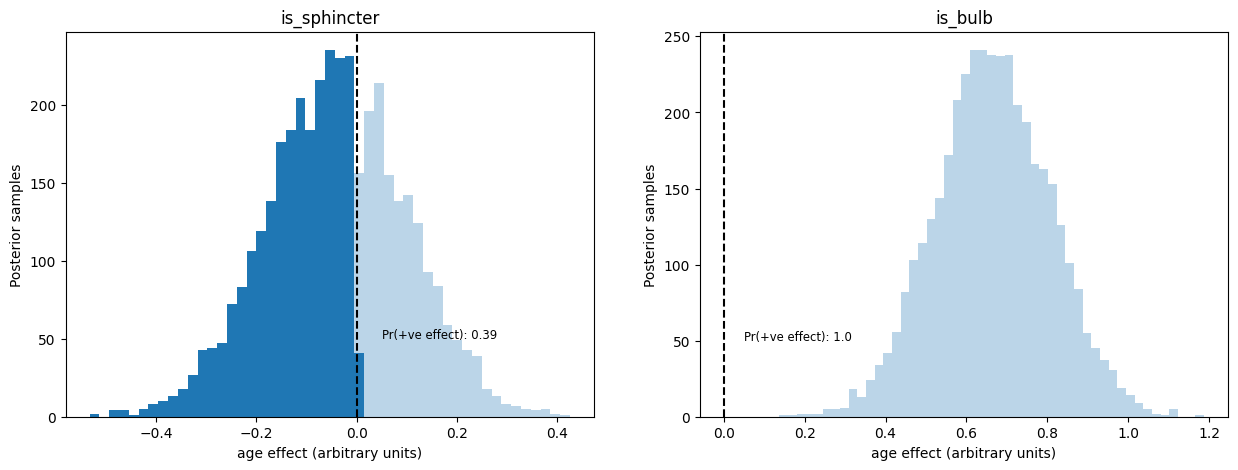

In [5]:
def plot_age_effect_samples(idata, ax):

    age_effect_samples = idata.posterior["age"].to_numpy().flatten()
    tstat = (age_effect_samples > 0).mean()
    bins = np.linspace(age_effect_samples.min(), age_effect_samples.max(), 50)
    
    ax.hist(age_effect_samples[age_effect_samples < 0], bins=bins);
    ax.hist(age_effect_samples[age_effect_samples > 0], bins=bins, alpha=0.3, color="tab:blue");
    
    
    ax.axvline(0.0, linestyle="--", color="black");
    ax.text(0.05, 50, f"Pr(+ve effect): {tstat.round(2)}", fontsize="small");
    return ax

f, axes = plt.subplots(1, 2, figsize=[15, 5])
for idata, ax in zip([idata_sphincter, idata_bulb], axes):
    plot_age_effect_samples(idata, ax)
    ax.set(
        xlabel="age effect (arbitrary units)",
        ylabel="Posterior samples",
        title=list(idata.observed_data.variables.keys())[-1]
    );

Computed from 4000 posterior samples and 1241 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -737.92    14.97
p_loo        4.21        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     1241  100.0%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

/home/teddy/repos/teddygroves/sphincter/.venv/lib/python3.13/site-packages/arviz/plots/khatplot.py:184: FutureWarning: support for DataArrays will be deprecated, please use ELPDData.The reason for this, is that we need to know the numbers of drawssampled from the posterior
  warnings.warn(


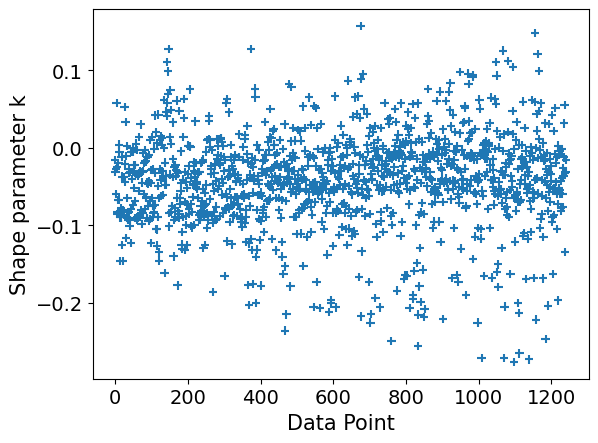

In [8]:
loo = az.loo(idata_sphincter, pointwise=True)
display(loo)
az.plot_khat(loo.pareto_k);

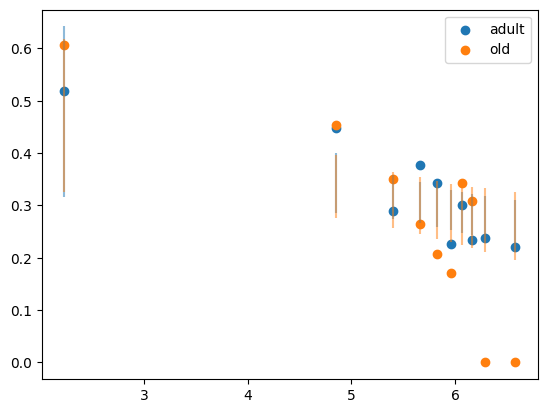

In [56]:
xcols = ["ln_depth", "branch_number", "logit_firstorder_per_pa"]
xcol_to_plot = "ln_depth"
model = models["is_sphincter"]
cuts = pd.qcut(branchpoints[xcol_to_plot], 10)
branchpoints["cut"] = cuts.map(lambda x: x.mid)
y = "is_sphincter"
plot_g = branchpoints.groupby(["cut", "age"], observed=True)
plotdf = (
    pd.DataFrame({y: plot_g[y].mean(), xcol_to_plot: plot_g["cut"].first()})
    .reset_index()
)
for col in xcols:
    if col != xcol_to_plot:
        plotdf[col] = branchpoints[col].mean()

pred = model.predict(idata_sphincter, data=plotdf, inplace=False)
plotdf["q5pct"], plotdf["q95pct"] = (
    pred.posterior["p"].quantile(q, dim=["chain", "draw"]).to_numpy()
    for q in (0.01, 0.99)
)

f,ax = plt.subplots()

for age, subdf in plotdf.groupby("age", observed=True):
    sct = ax.scatter(subdf[xcol_to_plot], subdf[y], label=age);
    ax.vlines(
        subdf[xcol_to_plot], 
        subdf["q5pct"], 
        subdf["q95pct"], 
        color=sct.get_edgecolors()[0],
        alpha=0.5,
    );
ax.legend();

In [47]:

plotdf

,cut,age,is_sphincter,ln_depth,branch_number,logit_firstorder_per_pa,q5pct,q95pct
0,2.2325,adult,0.518519,2.2325,3.482675,-0.102746,0.362265,0.590860
1,2.2325,old,0.605634,2.2325,3.482675,-0.102746,0.361793,0.576593
2,4.8510,adult,0.448276,4.8510,3.482675,-0.102746,0.302124,0.381320
3,4.8510,old,0.454545,4.8510,3.482675,-0.102746,0.291618,0.376756
4,5.4040,adult,0.289855,5.4040,3.482675,-0.102746,0.285638,0.345784
5,5.4040,old,0.350877,5.4040,3.482675,-0.102746,0.269431,0.346702
6,5.6560,adult,0.376812,5.6560,3.482675,-0.102746,0.276317,0.331965
7,5.6560,old,0.264151,5.6560,3.482675,-0.102746,0.257992,0.335026
8,5.8225,adult,0.342466,5.8225,3.482675,-0.102746,0.269473,0.323729
9,5.8225,old,0.207547,5.8225,3.482675,-0.102746,0.249791,0.328246
